In [482]:
install.packages("readxl",repos = 'https://cran.r-project.org/')
library(readxl)


Installing package into 'C:/Users/mpalg/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'readxl' is in use and will not be installed"

In [483]:
library(ggplot2)
library(ggrepel)
library(dplyr)
library(broom)

In [495]:
data <- read_excel("NHLTop100.xlsx")
head(data)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [496]:
plname <- select(data,Player)
plname$Player[plname$Player != "Wayne Gretzky"] <- ""


Call:
lm(formula = A ~ G, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


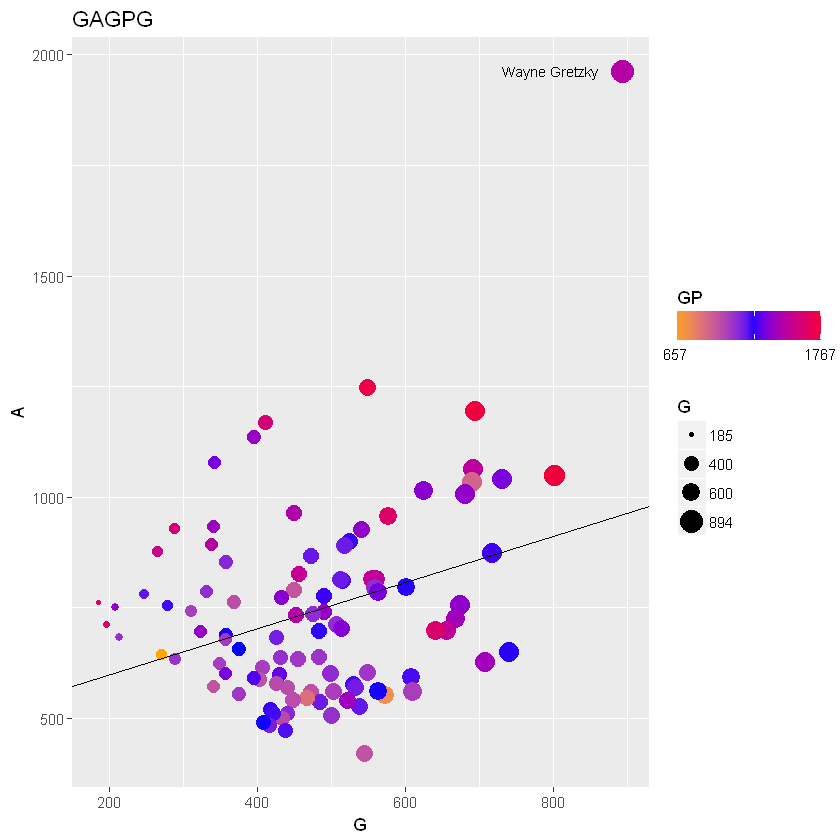

In [497]:
linearModel <- lm(A ~ G, data)
lmsumm <- summary(linearModel)
lmsumm
coefs <- coef(linearModel)

linearModelpred <- predict(linearModel)
minGP = min(data$GP)
maxGP = max(data$GP)
meanGP = mean(data$GP)
p1 <- ggplot(data, aes(x = data$G, y = data$A))
p1 + geom_point(aes(color = data$GP,size = data$G)) +  geom_abline(intercept = coefs[1],slope = coefs[2]) +
                scale_color_gradient2(name="GP",
                                        breaks = c(minGP, meanGP, maxGP),
                                        labels = c(minGP," ",maxGP),
                                        low = "orange",
                                        high = "red",
                                        mid = "blue",
                                        midpoint = meanGP,
                                        guide = guide_colorbar(direction = "horizontal", title.position = "top",
                                        label.position = "bottom")) + scale_size(name="G", breaks = c(185,400,600,894)) +
                                        labs(title = "GAGPG", y = "A", x = "G") +
                                        geom_text(aes(label=plname$Player), size = 3, hjust = 1.25)

reference <- data.frame(lmsumm$r.squared,lmsumm$coefficients[2,4])
#reference$PValue <- lmsumm$coefficients[2,4]
names(reference) <- c("Rsquared","PValue")
#reference


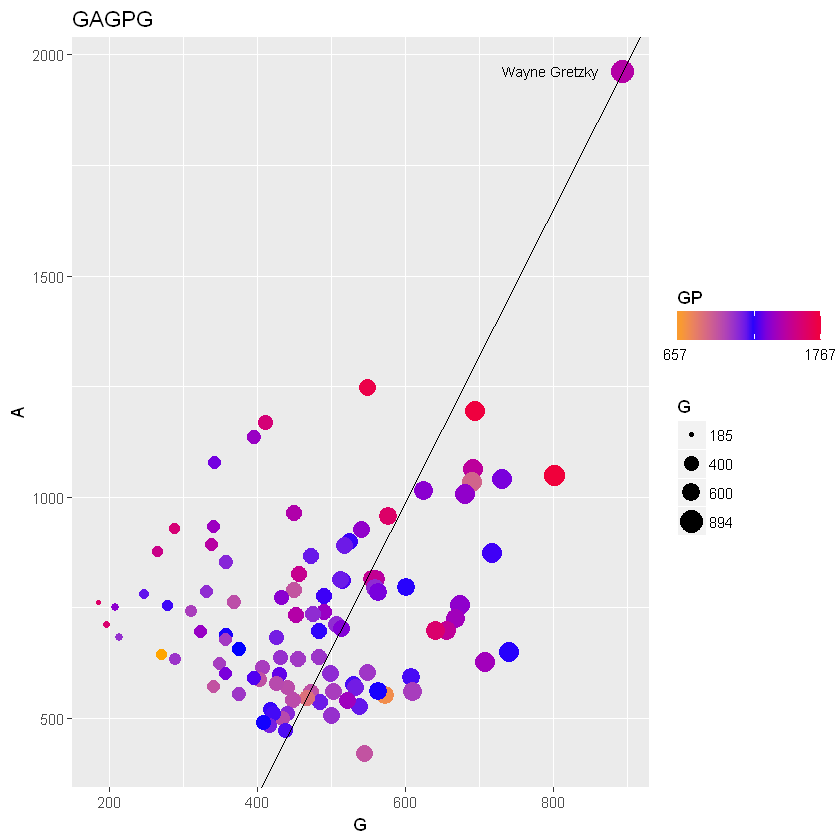

In [498]:
y <- 1963
x <- 894
WayneModel <- lm(I(A-y) ~ I(G-x), data)
wmsumm <- summary(WayneModel)
coefs <- coef(WayneModel)
m = (y-coefs[1])/x
WayneModelpred <- predict(WayneModel)
minGP = min(data$GP)
maxGP = max(data$GP)
meanGP = mean(data$GP)
p1 <- ggplot(data, aes(x = data$G, y = data$A))
p1 + geom_point(aes(color = data$GP,size = data$G)) +  geom_abline(intercept = coefs[1], slope = m) +
                scale_color_gradient2(name="GP",
                                        breaks = c(minGP, meanGP, maxGP),
                                        labels = c(minGP," ",maxGP),
                                        low = "orange",
                                        high = "red",
                                        mid = "blue",
                                        midpoint = meanGP,
                                        guide = guide_colorbar(direction = "horizontal", title.position = "top",
                                        label.position = "bottom")) + scale_size(name="G", breaks = c(185,400,600,894)) +
                                        labs(title = "GAGPG", y = "A", x = "G") +
                                        geom_text(aes(label=plname$Player), size = 3, hjust = 1.25)
reference<-rbind(reference,c(wmsumm$r.squared,wmsumm$coefficients[2,4]))
#reference

In [499]:

newdata <- data
newdata[101,2] <- "Patrick Kane"
newdata[101,7] <- 736
newdata[101,8] <- 285
newdata[101,9] <- 465

In [500]:
plname1 <- select(newdata,Player)
plname1$Player[plname1$Player != "Patrick Kane"] <- ""


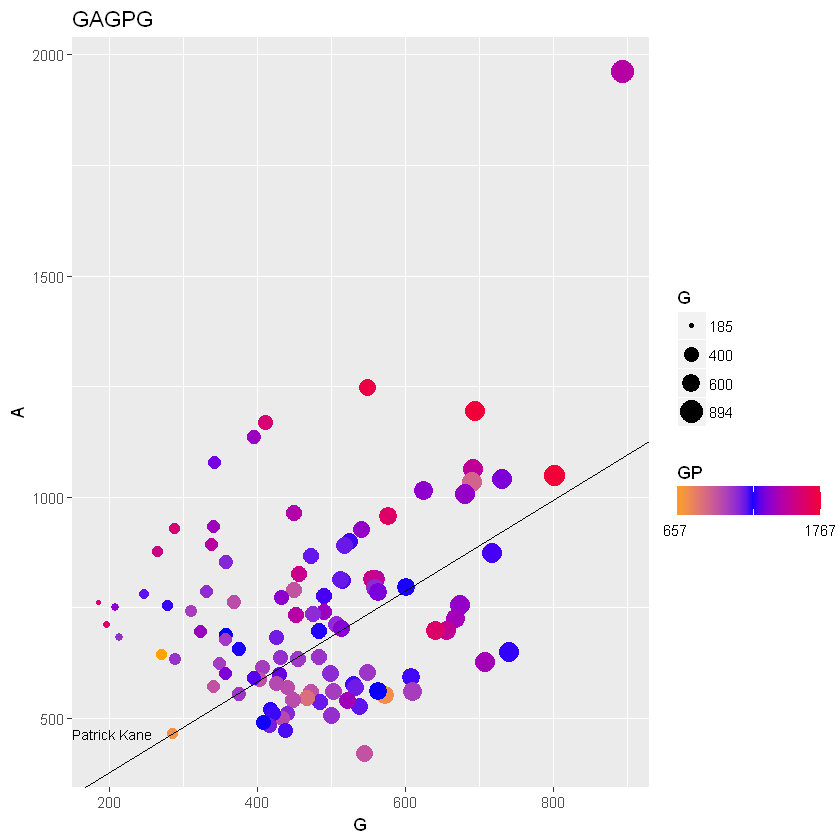

In [501]:
y <- 465
x <- 285
#newdata

KaneModel <- lm(I(A-465) ~ I(G-285), newdata)
kmsumm <- summary(KaneModel)

coefs <- coef(KaneModel)
m = (y-coefs[1])/x
minGP = min(newdata$GP)
maxGP = max(newdata$GP)
meanGP = mean(newdata$GP)
p2 <- ggplot(newdata, aes(x = newdata$G, y = newdata$A))
p2 + geom_point(aes(color = newdata$GP,size = newdata$G)) +  geom_abline(intercept = coefs[1], slope = m) +
                scale_color_gradient2(name="GP",
                                        breaks = c(minGP, meanGP, maxGP),
                                        labels = c(minGP," ",maxGP),
                                        low = "orange",
                                        high = "red",
                                        mid = "blue",
                                        midpoint = meanGP,
                                        guide = guide_colorbar(direction = "horizontal", title.position = "top",
                                        label.position = "bottom")) + scale_size(name="G", breaks = c(185,400,600,894)) +
                                        labs(title = "GAGPG", y = "A", x = "G") +
                                        geom_text(aes(label=plname1$Player), size = 3, hjust = 1.25)
reference<-rbind(reference,c(kmsumm$r.squared,kmsumm$coefficients[2,4]))
#reference

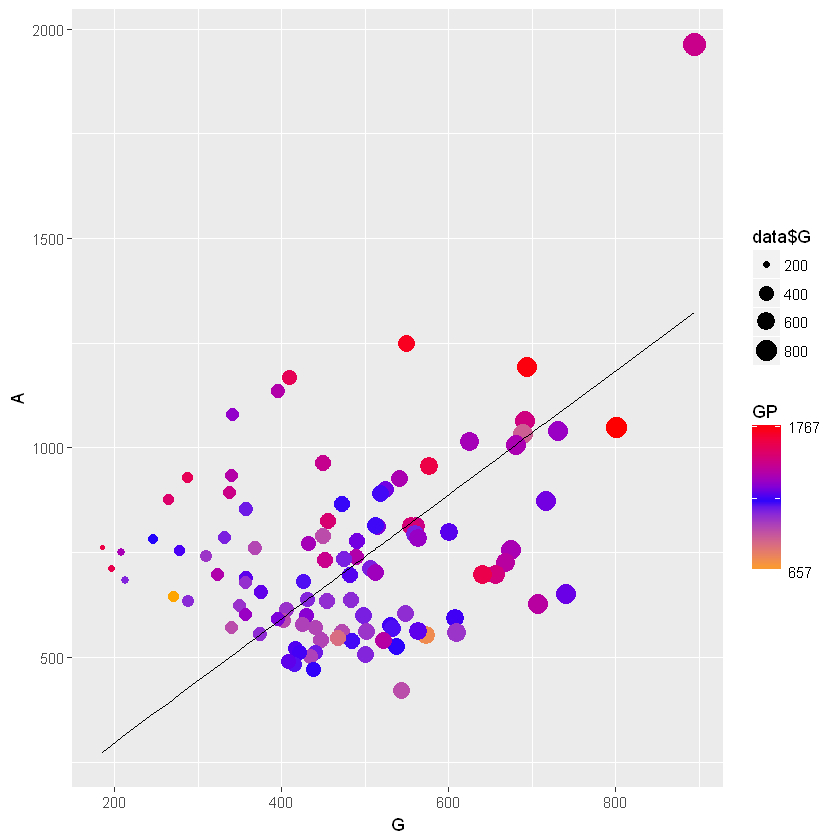

In [502]:
mod <- lm(data$A~data$G+0,data = data)
modsumm <- summary(mod)
#modsumm$coefficients

p1 <- ggplot(data, aes(x = G, y = A))
p1 + geom_point(aes(size = data$G,colour=GP)) +
    scale_color_gradient2(name="GP",
                             breaks = c(657,1212,1767),
                             labels = c("657"," ","1767"),low = "orange", mid="blue", high = "red",midpoint = 1212) + 
    geom_line(aes(y = predict(mod)))
reference<-rbind(reference,c(modsumm$r.squared,modsumm$coefficients[1,4]))
#reference

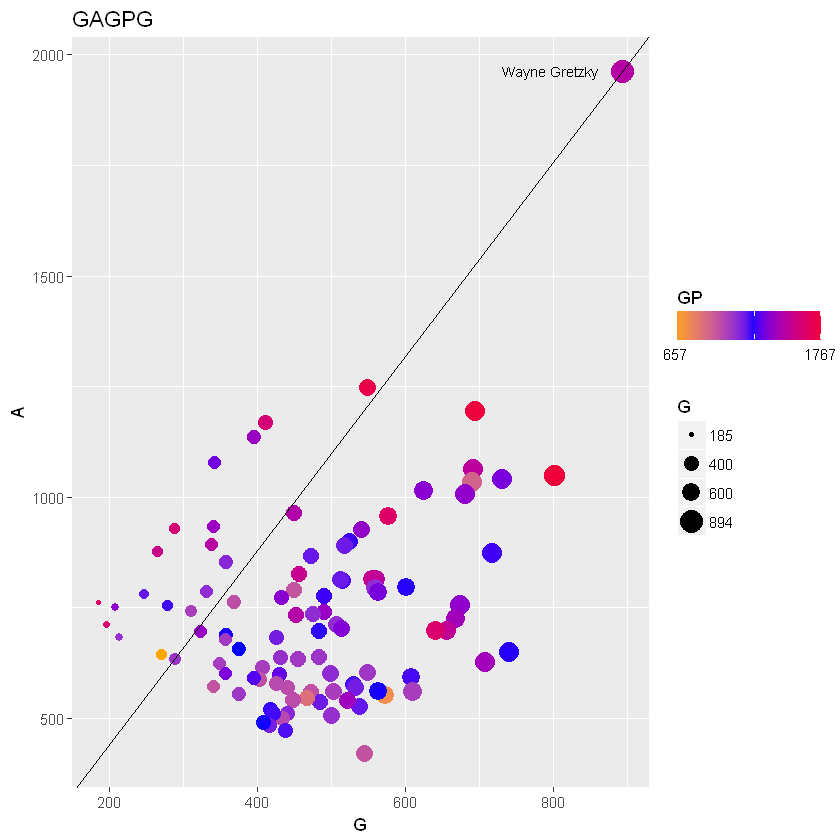

In [503]:
y <- 1963
x <- 894
WayneModel <- lm(I(A-y) ~ I(G-x)+0, data)
wmsumm1 <- summary(WayneModel)

coefs <- coef(WayneModel)
m = (y-coefs[1])/x
#summary(WayneModel1)
minGP = min(data$GP)
maxGP = max(data$GP)
meanGP = mean(data$GP)
p1 <- ggplot(data, aes(x = data$G, y = data$A))
p1 + geom_point(aes(color = data$GP,size = data$G)) +  geom_abline(intercept = coefs[1], slope = m) +
                scale_color_gradient2(name="GP",
                                        breaks = c(minGP, meanGP, maxGP),
                                        labels = c(minGP," ",maxGP),
                                        low = "orange",
                                        high = "red",
                                        mid = "blue",
                                        midpoint = meanGP,
                                        guide = guide_colorbar(direction = "horizontal", title.position = "top",
                                        label.position = "bottom")) + scale_size(name="G", breaks = c(185,400,600,894)) +
                                        labs(title = "GAGPG", y = "A", x = "G") +
                                        geom_text(aes(label=plname$Player), size = 3, hjust = 1.25)
reference<-rbind(reference,c(wmsumm1$r.squared,wmsumm1$coefficients[1,4]))
#reference

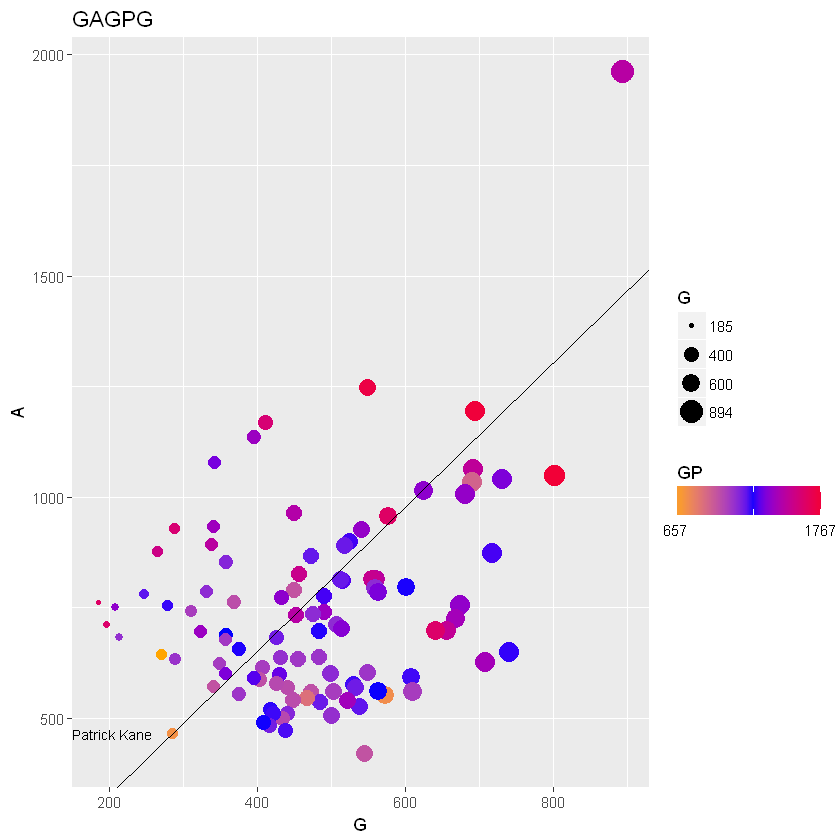

In [504]:
y <- 465
x <- 285
KaneModel <- lm(I(A-y) ~ I(G-x)+0, data = newdata)
kmsumm1 <- summary(KaneModel)

coefs <- coef(KaneModel)
#coefs[1]


m = (y-coefs[1])/x
minGP = min(newdata$GP)
maxGP = max(newdata$GP)
meanGP = mean(newdata$GP)
p1 <- ggplot(newdata, aes(x = newdata$G, y = newdata$A))
p1 + geom_point(aes(color = newdata$GP,size = newdata$G)) +  geom_abline(intercept = coefs[1], slope = m) +
                scale_color_gradient2(name="GP",
                                        breaks = c(minGP, meanGP, maxGP),
                                        labels = c(minGP," ",maxGP),
                                        low = "orange",
                                        high = "red",
                                        mid = "blue",
                                        midpoint = meanGP,
                                        guide = guide_colorbar(direction = "horizontal", title.position = "top",
                                        label.position = "bottom")) + scale_size(name="G", breaks = c(185,400,600,894)) +
                                        labs(title = "GAGPG", y = "A", x = "G") +
                                        geom_text(aes(label=plname1$Player), size = 3, hjust = 1.25)
reference<-rbind(reference,c(kmsumm1$r.squared,kmsumm1$coefficients[1,4]))
#reference

In [505]:
library(data.table)
reference<-as.data.table(reference)
rownames(reference)<-c('Default LM','Wayne LM','Kane LM','Origin LM','Wayne Origin LM','Kane Origin LM')
reference

,Rsquared,PValue
Default LM,0.1082305,8.317169e-04
Wayne LM,0.1082305,8.317169e-04
Kane LM,0.1159517,4.934439e-04
Origin LM,0.8981861,6.490898e-51
Wayne Origin LM,0.9091456,2.298260e-53
Kane Origin LM,0.5731817,3.394245e-20
